# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "./data/cars_hw.csv"
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [37]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


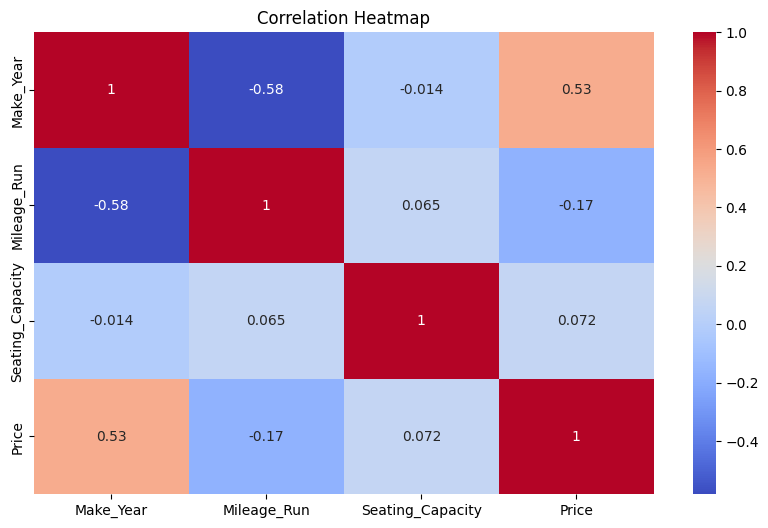

In [38]:
print(df.isnull().sum()) # no missing values

# Dropping the unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Correlation Heatmap --> make_year/price and make_year/mileage_run have correlation a little over 0.5
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

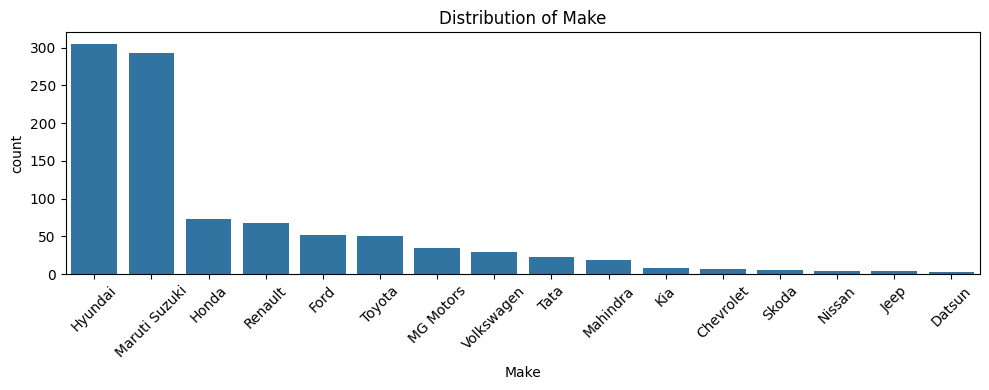

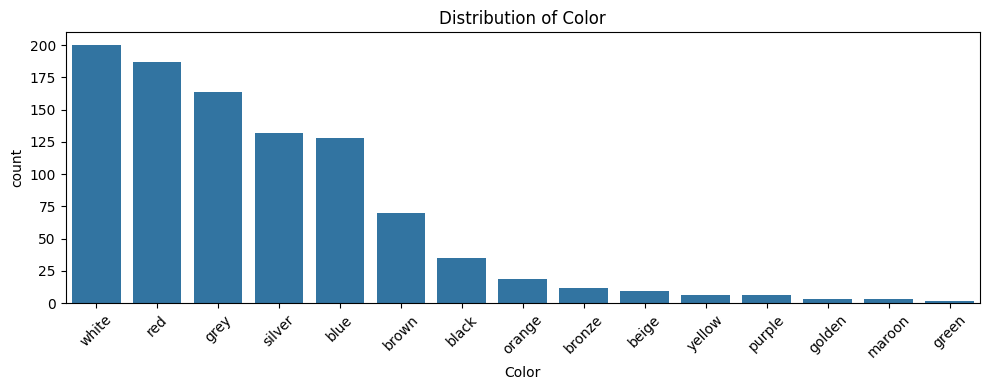

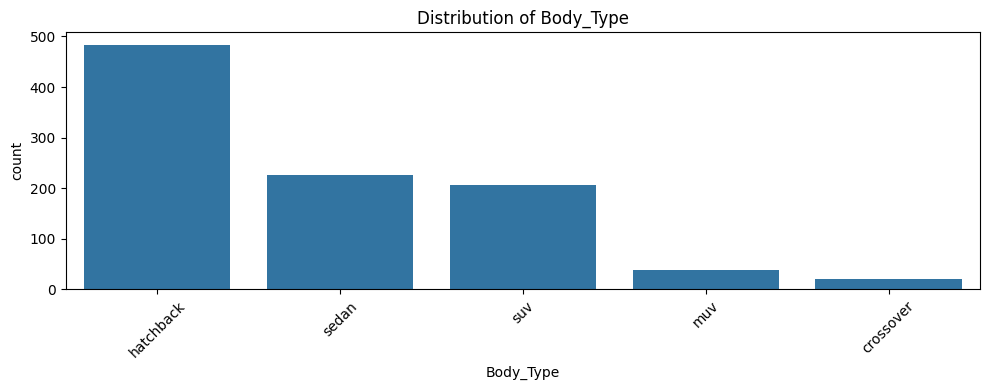

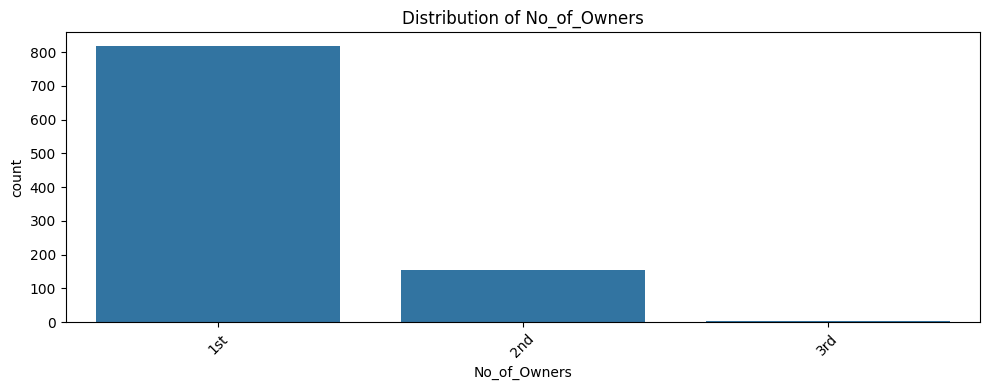

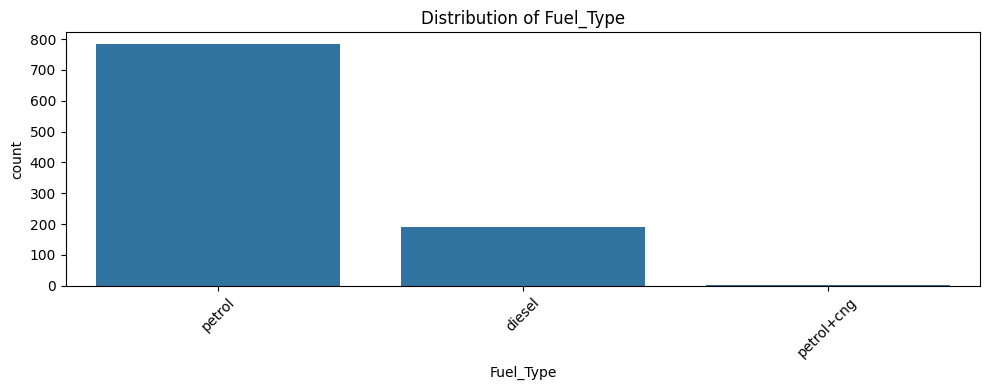

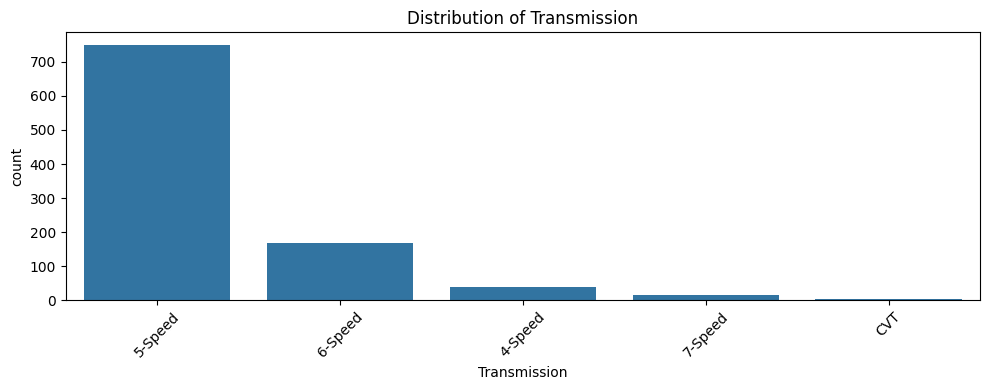

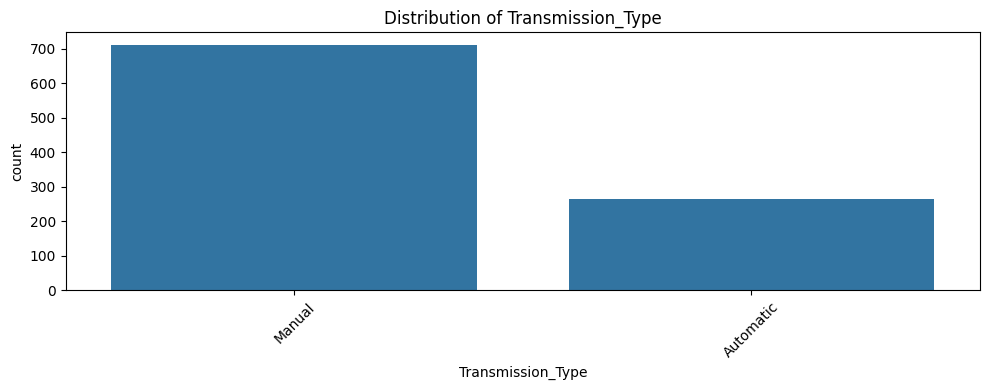

In [39]:
# Distribution of Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

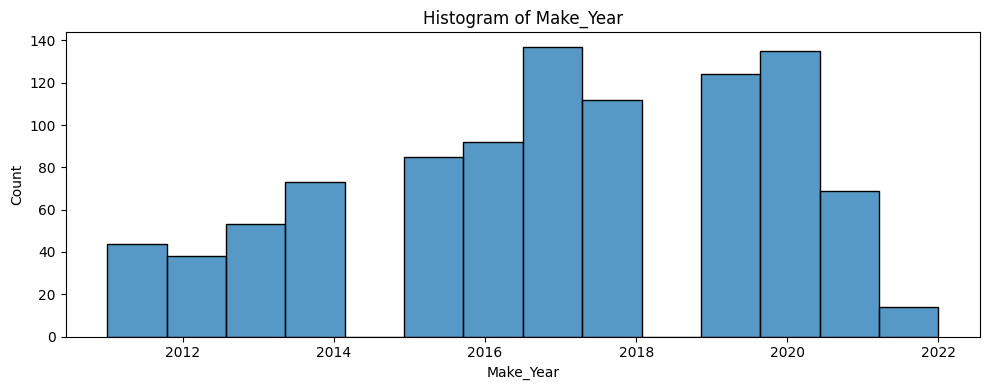

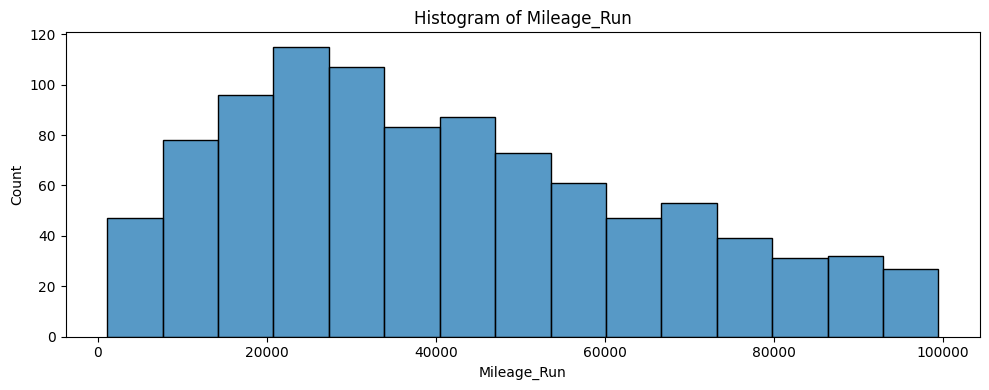

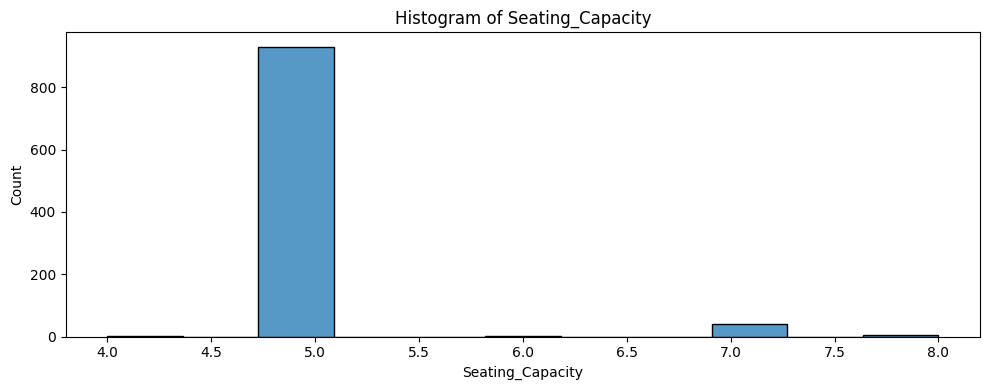

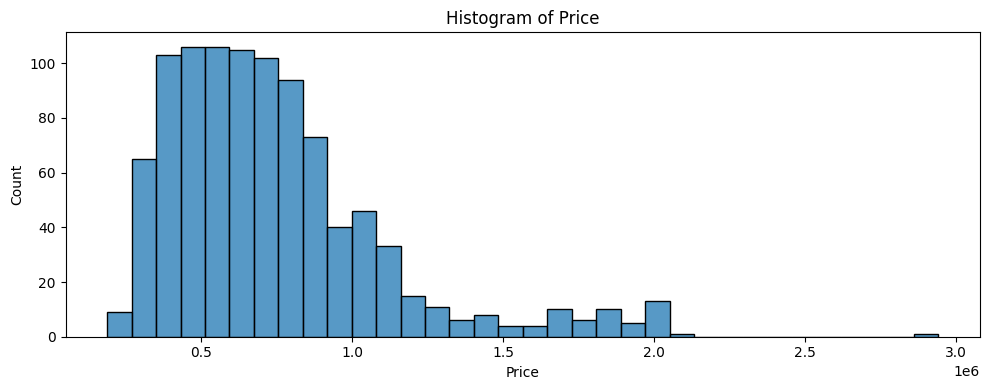

In [40]:
# Distribution of Numeric Variables
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=False)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [41]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

3. Implement an ~80/~20 train-test split. Put the test data aside.


In [42]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, R²: {train_r2:.3f}")
print(f"Test RMSE: {test_rmse:.2f}, R²: {test_r2:.3f}")


Train RMSE: 142114.26, R²: 0.855
Test RMSE: 143575.20, R²: 0.820


The model on the training set does slightly better.

5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 


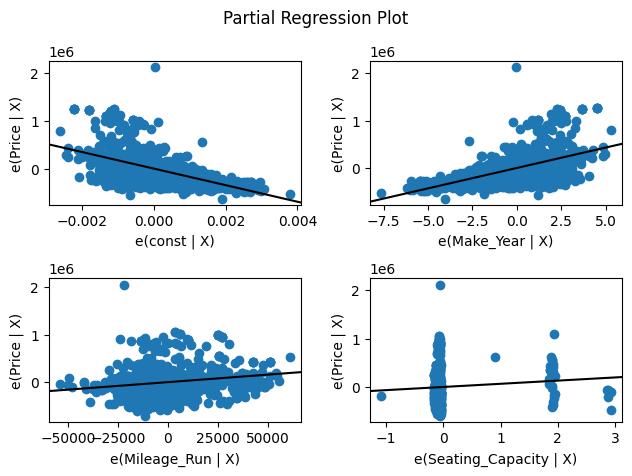

In [ ]:
import statsmodels.api as sm

X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

X_sm = sm.add_constant(X_train_numeric)
model_sm = sm.OLS(y_train, X_sm).fit()

fig = sm.graphics.plot_partregress_grid(model_sm)
fig.tight_layout(pad=1.0)
plt.show()


Mileage and year have slightly curvatures that may be worth exploring.

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [ ]:
df_encoded['log_mileage'] = np.log(df['Mileage_Run'] + 1)
df_encoded['year_squared'] = df['Make_Year'] ** 2
df_encoded['mileage_year_interaction'] = df['Mileage_Run'] * df['Make_Year']


X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_complex = LinearRegression()
model_complex.fit(X_train, y_train)

y_train_pred = model_complex.predict(X_train)
y_test_pred = model_complex.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Complex Model - Train RMSE: {train_rmse:.2f}, R²: {train_r2:.3f}")
print(f"Complex Model - Test RMSE: {test_rmse:.2f}, R²: {test_r2:.3f}")

Complex Model - Train RMSE: 140760.27, R²: 0.858
Complex Model - Test RMSE: 142490.67, R²: 0.823


The more complex model performs slightly better on both the training and the test sets than the simpler one. 

7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


The initial models used raw numeric and one-hot encoded variables without transformations or interactions. These models achieved moderate R² values but were limited in their ability to capture complex relationships in the data. The RMSE on the test set indicated room for improvement. Afterwards, the partial regression plots revealed non-linear patterns in Mileage_Run and possibly in Make_Year. Therefore, a more complex linear regression model was built incorporating log transformation of Mileage_Run, a squared term for Make_Year, and an interaction term between Mileage_Run and Make_Year. This model showed improved performance on both the training and test sets, with higher R² and lower RMSE than the simpler models. However, the performance gain on the test set was smaller than on the training set, suggesting some overfitting, though not extreme.

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.